 Детальная и комплексная кластеризация спиртных напитков объемом 0.7 л, которые продаются в сети ["КуулКлевер"](https://www.coolclever.ru/catalog/otdokhni/all?filters=11099%255B0%255D%3D10%2611099%255B1%255D%3D11%2611099%255B2%255D%3D9%2611099%255B3%255D%3D12%2611099%255B4%255D%3D17%2611099%255B5%255D%3D13%2611099%255B6%255D%3D14%2611099%255B7%255D%3D15%2611099%255B8%255D%3D16%2611099%255B9%255D%3D43%2611109%255B0%255D%3D0.700&sort=cheap&page=9), с помощью различных методов машинного обучения.


In [150]:
# Объявляю нужные библиотеки
import pandas as pd # Библиотека для работы с фреймворками
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import seaborn as sns # Библиотека для визуализации данных
import numpy as np # Библиотека для математических операций
from sklearn.preprocessing import LabelEncoder # Инструмент разметки текстовых данных
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans # Инструменты кластеризации
from sklearn.metrics import davies_bouldin_score # Инструменты оценки качества кластеризации

In [151]:
# Загрузка датасета из csv-файла
df = pd.read_csv('CoolClever.csv', sep=',')
df

,Напиток,Цена,Страна,Крепость,Выдержка,Подарочная упаковка
0,Водка,490,Россия,40,0.0,0
1,Водка,490,Россия,40,0.0,0
2,Водка,490,Россия,40,0.0,0
3,Водка,539,Россия,40,0.0,0
4,Водка,539,Россия,40,0.0,0
...,...,...,...,...,...,...
201,Коньяк,36000,Франция,41,29.0,1
202,Коньяк,40000,Франция,41,30.0,0
203,Коньяк,50000,Франция,42,35.0,1
204,Виски,59000,Шотландия,46,25.0,1


In [152]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Напиток              206 non-null    object 
 1   Цена                 206 non-null    int64  
 2   Страна               206 non-null    object 
 3   Крепость             206 non-null    int64  
 4   Выдержка             206 non-null    float64
 5   Подарочная упаковка  206 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.8+ KB


Перед кластеризацией необходимо провести комплексный и детальный анализ данных, собранных в таблице, чтобы выявить имеющиеся закономерности.

In [153]:
# Описание датасета
df.describe()

,Цена,Крепость,Выдержка,Подарочная упаковка
count,206.000000,206.000000,206.000000,206.000000
mean,6743.873786,41.567961,7.104369,0.500000
std,9124.039502,5.200632,9.361834,0.501218
min,490.000000,17.000000,0.000000,0.000000
25%,1992.250000,40.000000,2.000000,0.000000
50%,3490.000000,40.000000,4.000000,0.500000
75%,7775.000000,42.000000,10.000000,1.000000
max,59000.000000,59.000000,57.000000,1.000000


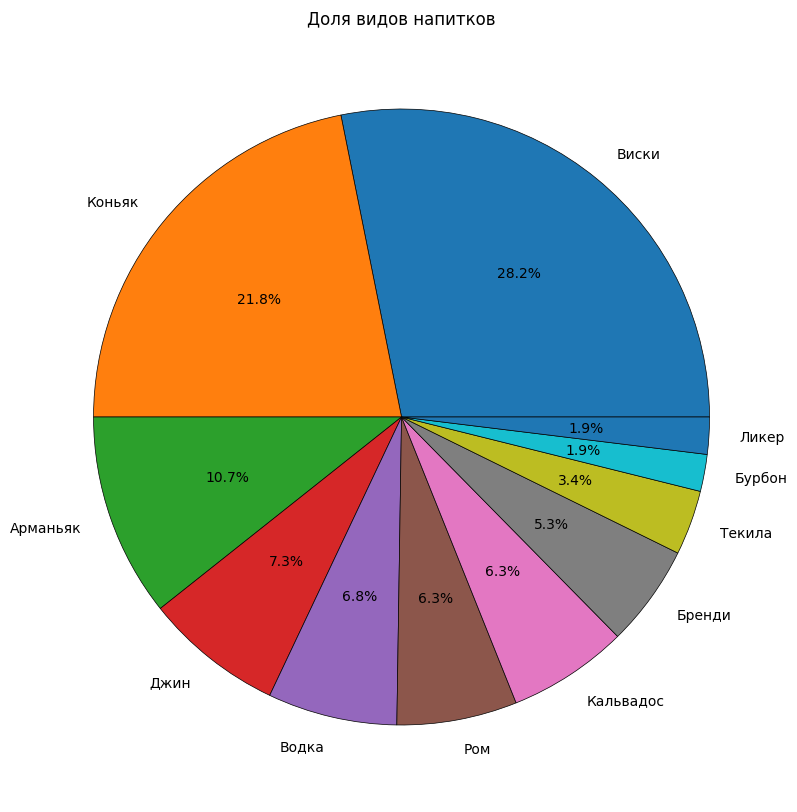

In [154]:
# Доля видов напитков в таблице
plt.figure(figsize=(10,10))
df['Напиток'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'}
    )
plt.title('Доля видов напитков')
plt.ylabel('')
plt.show()

Почти половину (49%) портфеля напитков занимают виски и коньяк.

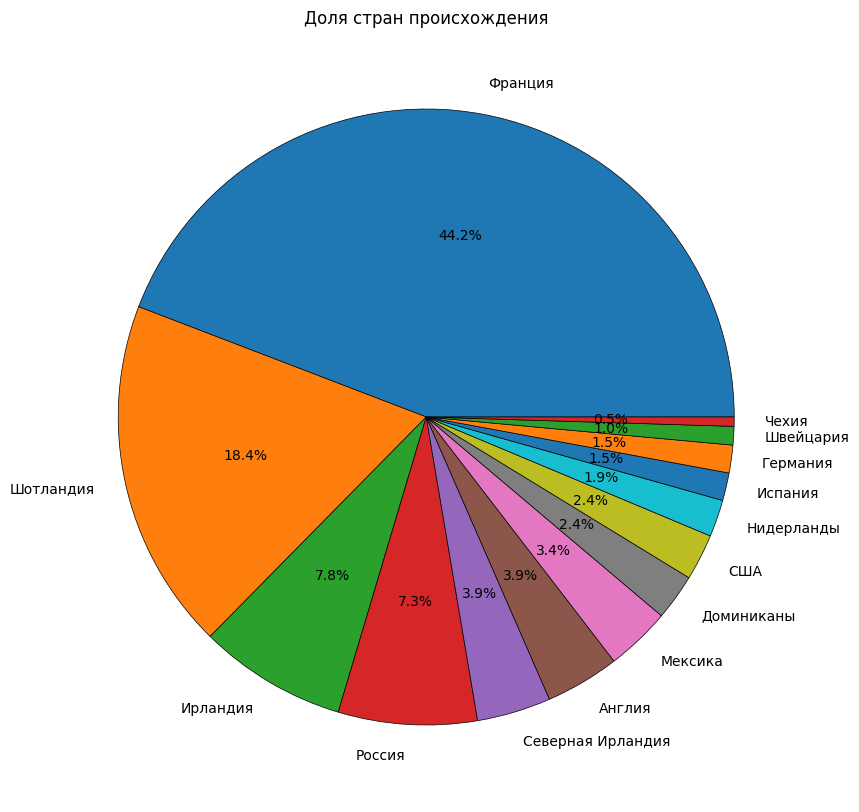

In [155]:
# Доля стран в напитке
plt.figure(figsize=(10,10))
df['Страна'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'}
    )
plt.title('Доля стран происхождения')
plt.ylabel('')
plt.show()

На отечественные напитки приходится лишь 7.3% от всего портфеля. В то же время большая часть ассортимента импортируется из Франции (44.2%).

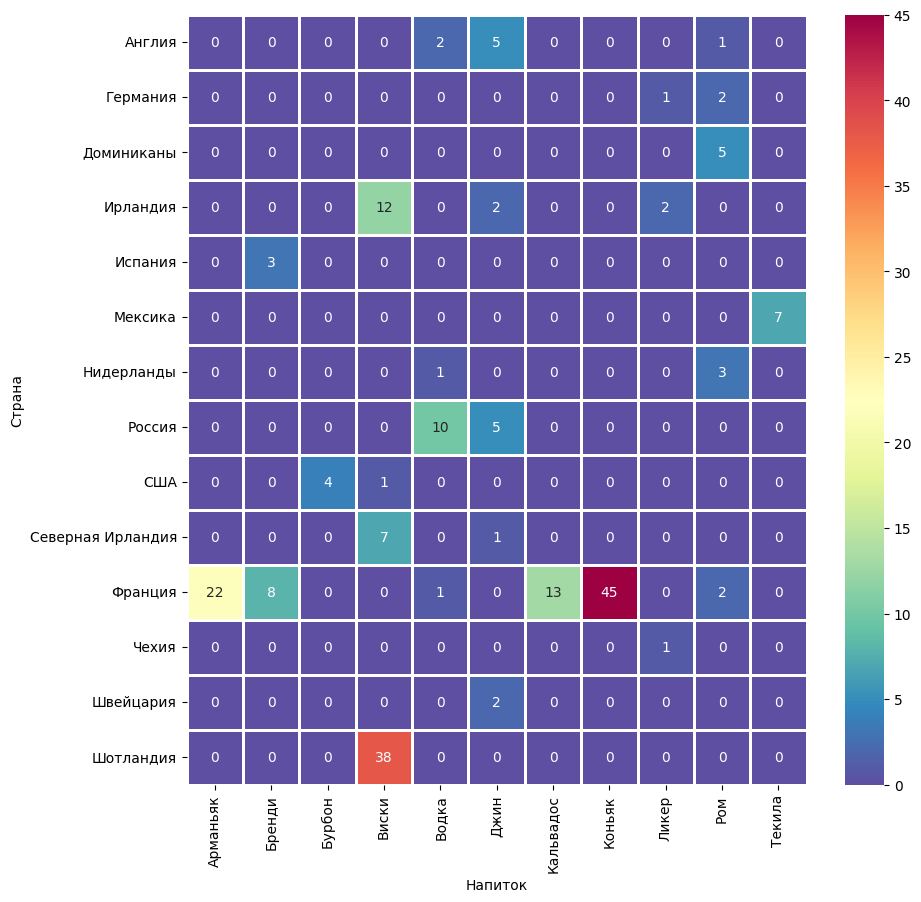

In [156]:
# Связь между видом напитков и страной происхождения 
cross_tab = pd.crosstab(df['Страна'],df['Напиток']) # Таблица сопряженности между видом напитка и страной происхождения
#
# Тепловая карта сопряженности
plt.figure(figsize=(10,10))
sns.heatmap(cross_tab, annot=True, cmap='Spectral_r', linewidths=1)
plt.show()

Франция является лидером в плане коньяка, арманьяка и бренди. Шотландия существенным образом опережает Ирландию и Северную Ирландию по виски. Единственным поставщиком текилы является Мексика. Доминиканы заметным образом не опережают другие страны по рому. Отечественный сегмент огранен водкой и джином.

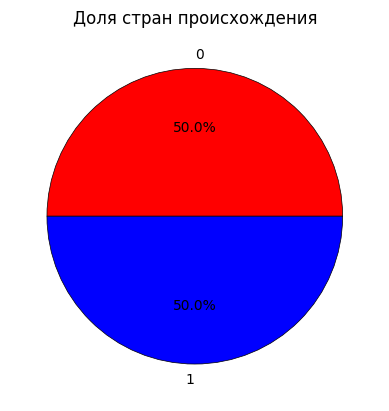

In [157]:
# Доля подарочных версий
df['Подарочная упаковка'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'},
        colors = ['red','blue']
    )
plt.title('Доля стран происхождения')
plt.ylabel('')
plt.show()

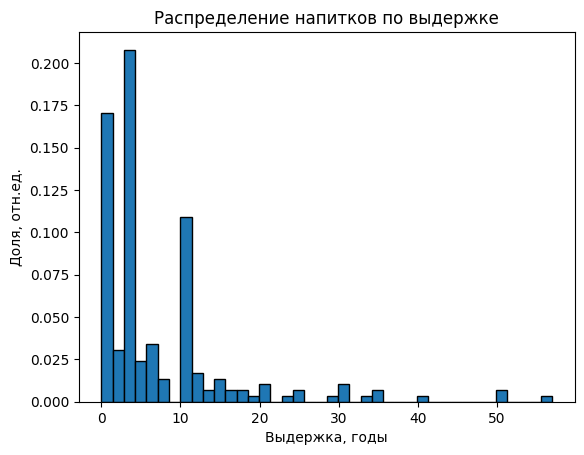

In [158]:
# Распределение напитков по годам выдержки
hist, bins = np.histogram(df['Выдержка'].to_numpy(), bins=40)
plt.hist(df['Выдержка'].to_numpy(), bins=bins, density=True, edgecolor='black', linewidth=1)
plt.title('Распределение напитков по выдержке')
plt.xlabel('Выдержка, годы')
plt.ylabel('Доля, отн.ед.')
plt.show()

Основная часть портфеля состоит из напитков, где либо нет выдержанных спиртов, либо их минимальный возраст находится в пределах 1-10 лет.

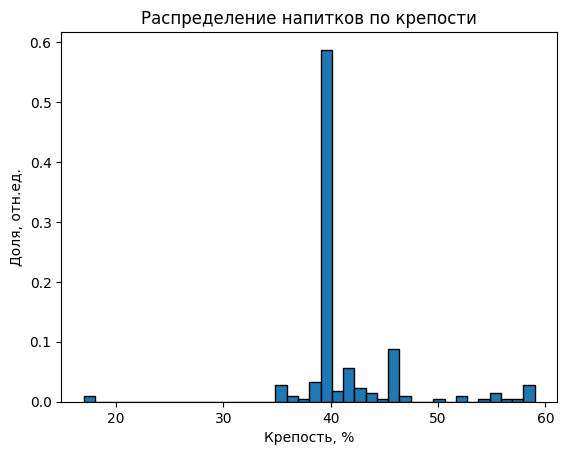

In [159]:
# Распределение напитков по крепости
hist, bins = np.histogram(df['Крепость'].to_numpy(), bins=40)
plt.hist(df['Крепость'].to_numpy(), bins=bins, density=True, edgecolor='black', linewidth=1)
plt.title('Распределение напитков по крепости')
plt.xlabel('Крепость, %')
plt.ylabel('Доля, отн.ед.')
plt.show()

Основная доля напитков приходится на крепость в пределах 35-50%. Явным лидером является крепость 40%.

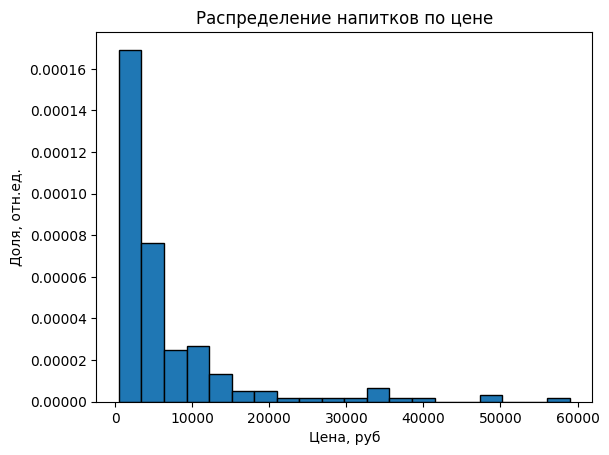

In [160]:
# Распределение напитков по цене
hist, bins = np.histogram(df['Цена'].to_numpy(), bins=20)
plt.hist(df['Цена'].to_numpy(), bins=bins, density=True, edgecolor='black', linewidth=1)
plt.title('Распределение напитков по цене')
plt.xlabel('Цена, руб')
plt.ylabel('Доля, отн.ед.')
plt.show()

Цена большинства напитков распологается в диапазоне 500-10000 рублей.

In [161]:
# Разметка текстовых данных в таблице
le_spirits = LabelEncoder()
df['Напиток'] = le_spirits.fit_transform(df['Напиток'])
le_country = LabelEncoder()
df['Страна'] = le_country.fit_transform(df['Страна'])
df

,Напиток,Цена,Страна,Крепость,Выдержка,Подарочная упаковка
0,4,490,7,40,0.0,0
1,4,490,7,40,0.0,0
2,4,490,7,40,0.0,0
3,4,539,7,40,0.0,0
4,4,539,7,40,0.0,0
...,...,...,...,...,...,...
201,7,36000,10,41,29.0,1
202,7,40000,10,41,30.0,0
203,7,50000,10,42,35.0,1
204,3,59000,13,46,25.0,1


In [162]:
# Число кластеров, на которые планируется разделить табличные данные
n_clusters = 3

In [163]:
# Создание и обучение модели на основе AgglomerativeClustering
model_aggl = AgglomerativeClustering(n_clusters=n_clusters)
model_aggl.fit(df)

AgglomerativeClustering(n_clusters=3)

In [164]:
# Создание и обучение модели на основе DBSCAN
model_DBSCAN = DBSCAN(min_samples=n_clusters)
model_DBSCAN.fit(df)

DBSCAN(min_samples=3)

In [165]:
# Создание и обучение модели на основе KMeans
model_kmeans = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=18) # Инициализация KMeans
model_kmeans.fit(df) # Обучение модели на основе KMeans

KMeans(max_iter=1000, n_clusters=3, random_state=18)

In [166]:
# Метки кластеров Agglomerative Clustering
Aggl_labels = model_aggl.labels_
df['Aggl_labels'] = Aggl_labels

In [167]:
# Метки кластеров DBSCAN
DBSCAN_labels = model_DBSCAN.labels_
df['DBSCAN_labels'] = DBSCAN_labels

In [168]:
# Метки кластеров Kmeans
kmeans_labels = model_kmeans.labels_
df['kmeans_labels'] = kmeans_labels

In [169]:
# Оценка качества разбиения на кластеры с помощью Agglomerative Clustering
davies_bouldin_score(df, Aggl_labels)

0.4739418524703669

In [170]:
# Оценка качества разбиения на кластеры с помощью DBSCAN
davies_bouldin_score(df, DBSCAN_labels)

0.9110995482776496

In [171]:
# Оценка качества разбиения на кластеры с помощью KMeans
davies_bouldin_score(df, kmeans_labels)

0.4562355876543063

In [172]:
# Возвращение исходных текстовых данных в таблицу
df['Напиток'] = le_spirits.inverse_transform(df['Напиток'])
df['Страна'] = le_country.inverse_transform(df['Страна'])
df


,Напиток,Цена,Страна,Крепость,Выдержка,Подарочная упаковка,Aggl_labels,DBSCAN_labels,kmeans_labels
0,Водка,490,Россия,40,0.0,0,2,0,0
1,Водка,490,Россия,40,0.0,0,2,0,0
2,Водка,490,Россия,40,0.0,0,2,0,0
3,Водка,539,Россия,40,0.0,0,2,-1,0
4,Водка,539,Россия,40,0.0,0,2,-1,0
...,...,...,...,...,...,...,...,...,...
201,Коньяк,36000,Франция,41,29.0,1,1,-1,1
202,Коньяк,40000,Франция,41,30.0,0,1,-1,1
203,Коньяк,50000,Франция,42,35.0,1,1,-1,1
204,Виски,59000,Шотландия,46,25.0,1,1,-1,1


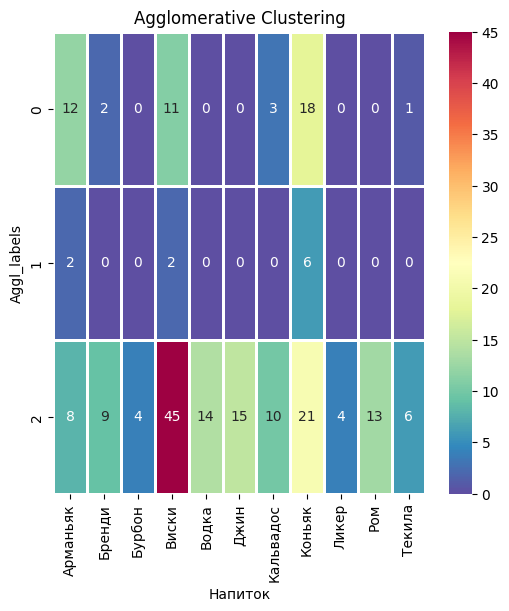

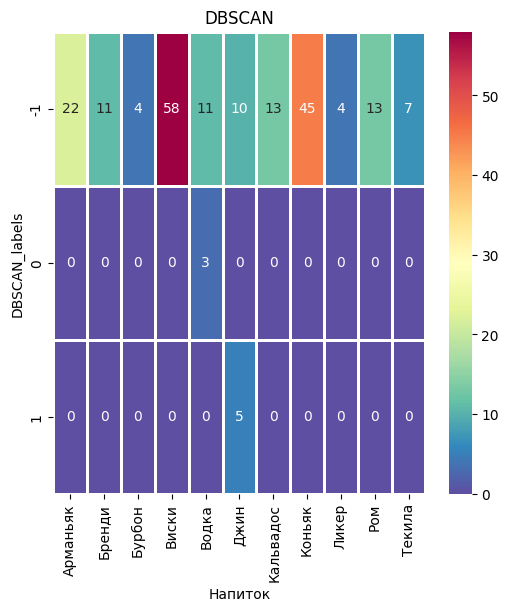

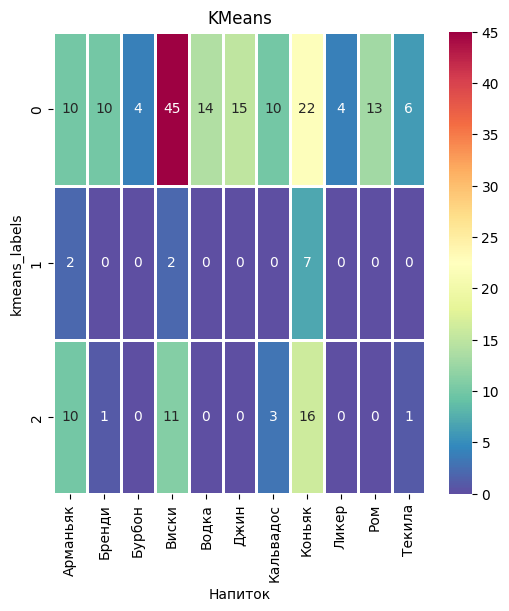

In [173]:
# Связь между кластерами и видом напитков
# Таблицы сопряженности между кластерами и видом напитка
cross_tab_Aggl = pd.crosstab(df['Aggl_labels'],df['Напиток']) 
cross_tab_DBSCAN = pd.crosstab(df['DBSCAN_labels'],df['Напиток']) 
cross_tab_kmeans = pd.crosstab(df['kmeans_labels'],df['Напиток']) 
#
# Тепловая карта сопряженности
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_Aggl, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('Agglomerative Clustering')
plt.show()
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_DBSCAN, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('DBSCAN')
plt.show()
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_kmeans, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('KMeans')
plt.show()

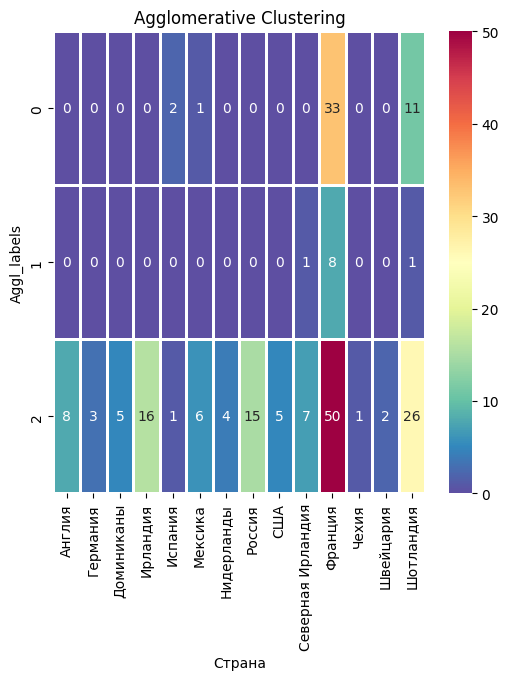

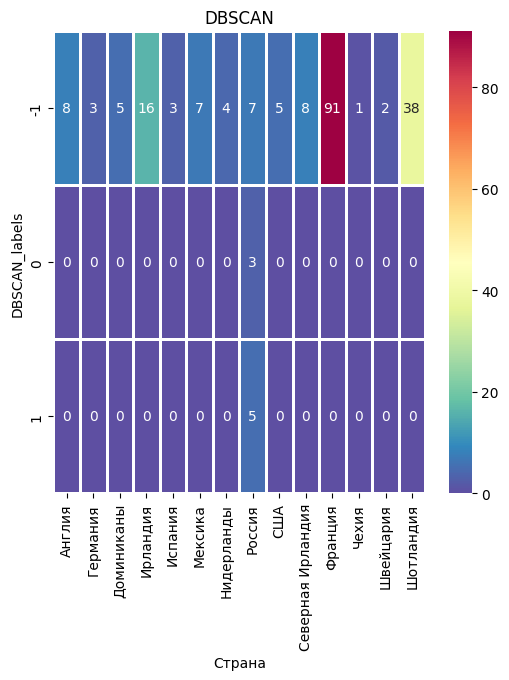

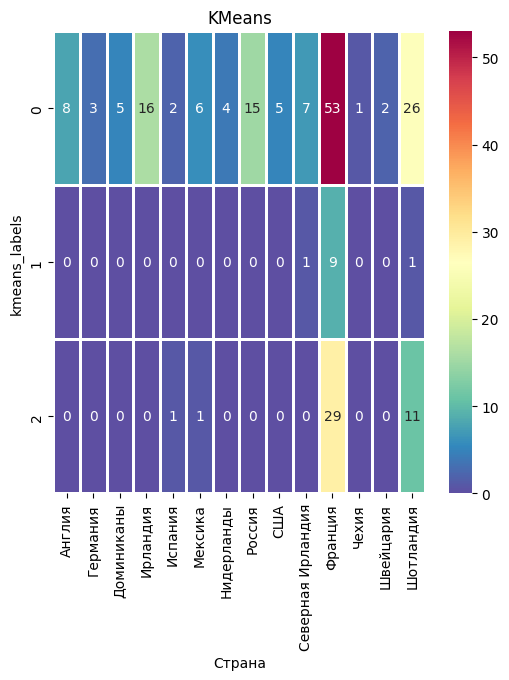

In [174]:
# Связь между кластерами и видом напитков
# Таблицы сопряженности между кластерами и страной происхождения
cross_tab_Aggl = pd.crosstab(df['Aggl_labels'],df['Страна']) 
cross_tab_DBSCAN = pd.crosstab(df['DBSCAN_labels'],df['Страна']) 
cross_tab_kmeans = pd.crosstab(df['kmeans_labels'],df['Страна']) 
#
# Тепловая карта сопряженности
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_Aggl, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('Agglomerative Clustering')
plt.show()
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_DBSCAN, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('DBSCAN')
plt.show()
plt.figure(figsize=(6,6))
sns.heatmap(cross_tab_kmeans, annot=True, cmap='Spectral_r', linewidths=1)
plt.title('KMeans')
plt.show()

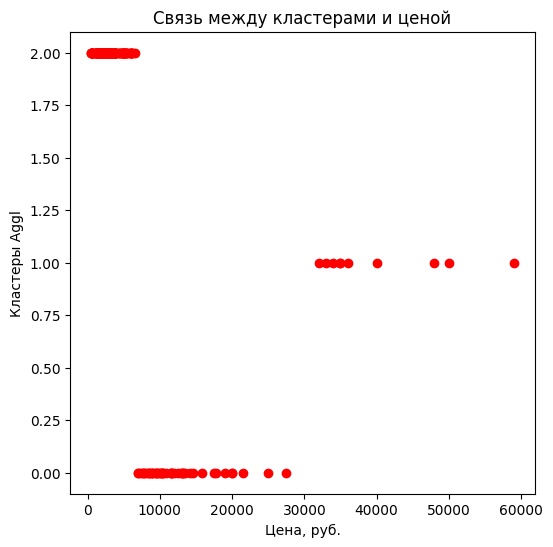

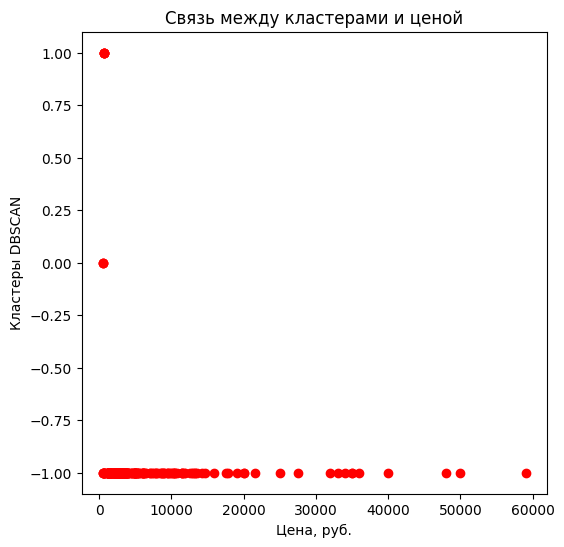

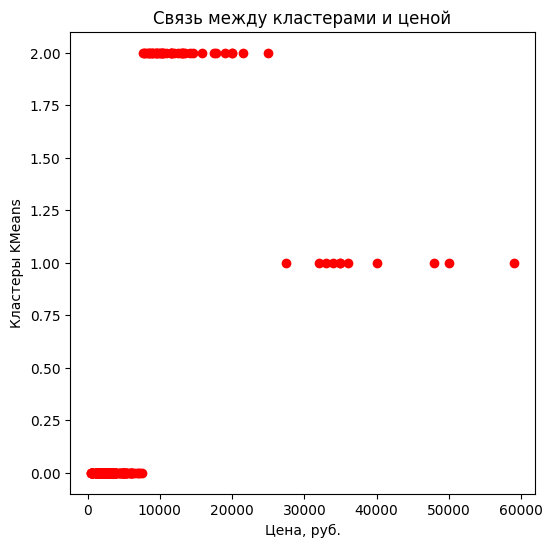

In [175]:
# Связь между кластерами и ценой напитка
plt.figure(figsize=(6,6))
plt.scatter(x=df['Цена'].to_numpy(),y=Aggl_labels, c='red')
plt.title('Связь между кластерами и ценой')
plt.ylabel('Кластеры Aggl')
plt.xlabel('Цена, руб.')
plt.show()
#
plt.figure(figsize=(6,6))
plt.scatter(x=df['Цена'].to_numpy(),y=DBSCAN_labels, c='red')
plt.title('Связь между кластерами и ценой')
plt.ylabel('Кластеры DBSCAN')
plt.xlabel('Цена, руб.')
plt.show()
#
plt.figure(figsize=(6,6))
plt.scatter(x=df['Цена'].to_numpy(),y=kmeans_labels, c='red')
plt.title('Связь между кластерами и ценой')
plt.ylabel('Кластеры KMeans')
plt.xlabel('Цена, руб.')
plt.show()